## Loading the Youtube Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
# Read the JSON file
with open('../Data/watch-history.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

df = pd.json_normalize(data)

I used the watch-history in json format as this is where my youtube watch history is recorded.

## Exploratory Data Analysis (EDA)

In [3]:
df

,header,title,titleUrl,subtitles,time,products,activityControls,description,details
0,YouTube,Watched 10 PROJECTS TO ADD TO YOUR DATA PORTFOLIO,https://www.youtube.com/watch?v=wObV_hwu2QM,"[{'name': 'Data With Mo', 'url': 'https://www....",2023-11-19T13:20:50.835Z,[YouTube],[YouTube watch history],NaN,NaN
1,YouTube,Watched END TO END DATA ANALYST PORTFOLIO PROJ...,https://www.youtube.com/watch?v=nl9eZl1IOKI,"[{'name': 'Data With Mo', 'url': 'https://www....",2023-11-19T13:18:34.016Z,[YouTube],[YouTube watch history],NaN,NaN
2,YouTube,Watched Cueshé - Ulan,https://www.youtube.com/watch?v=HP12yvlVNs8,"[{'name': 'CuesheVEVO', 'url': 'https://www.yo...",2023-11-19T13:16:36.666Z,[YouTube],[YouTube watch history],NaN,NaN
3,YouTube,Watched Coldplay - Viva La Vida (Official Video),https://www.youtube.com/watch?v=dvgZkm1xWPE,"[{'name': 'Coldplay', 'url': 'https://www.yout...",2023-11-19T13:12:31.731Z,[YouTube],[YouTube watch history],NaN,NaN
4,YouTube,Watched Post Malone - Circles,https://www.youtube.com/watch?v=wXhTHyIgQ_U,"[{'name': 'PostMaloneVEVO', 'url': 'https://ww...",2023-11-19T13:08:44.198Z,[YouTube],[YouTube watch history],NaN,NaN
...,...,...,...,...,...,...,...,...,...
43095,YouTube,Watched https://www.youtube.com/watch?v=yRL7M9...,https://www.youtube.com/watch?v=yRL7M9pw3Rc,NaN,2023-07-17T03:59:05.456Z,[YouTube],[YouTube watch history],NaN,NaN
43096,YouTube,Watched https://www.youtube.com/watch?v=ugaSmU...,https://www.youtube.com/watch?v=ugaSmUCR9Sc,NaN,2023-07-17T03:59:04.515Z,[YouTube],[YouTube watch history],NaN,[{'name': 'From Google Ads'}]
43097,YouTube,Watched https://www.youtube.com/watch?v=rarmC_...,https://www.youtube.com/watch?v=rarmC_ONJz4,NaN,2023-07-17T03:58:04.552Z,[YouTube],[YouTube watch history],NaN,NaN
43098,YouTube,Watched https://www.youtube.com/watch?v=LxYfSo...,https://www.youtube.com/watch?v=LxYfSoRLuz8,NaN,2023-07-17T03:58:02.843Z,[YouTube],[YouTube watch history],NaN,NaN


In [4]:
df.shape

(43100, 9)

In [5]:
df.columns

Index(['header', 'title', 'titleUrl', 'subtitles', 'time', 'products',
       'activityControls', 'description', 'details'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43100 entries, 0 to 43099
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   header            43100 non-null  object
 1   title             43100 non-null  object
 2   titleUrl          43015 non-null  object
 3   subtitles         36310 non-null  object
 4   time              43100 non-null  object
 5   products          43100 non-null  object
 6   activityControls  43100 non-null  object
 7   description       3741 non-null   object
 8   details           5814 non-null   object
dtypes: object(9)
memory usage: 3.0+ MB


In [7]:
df.isnull().sum()

header                  0
title                   0
titleUrl               85
subtitles            6790
time                    0
products                0
activityControls        0
description         39359
details             37286
dtype: int64

In [8]:
df['header'].nunique

<bound method IndexOpsMixin.nunique of 0        YouTube
1        YouTube
2        YouTube
3        YouTube
4        YouTube
          ...   
43095    YouTube
43096    YouTube
43097    YouTube
43098    YouTube
43099    YouTube
Name: header, Length: 43100, dtype: object>

### Pre-processing

#### Drop some columns

In [9]:
columns_to_drop = ['header','subtitles', 'activityControls', 'products']
df.drop(columns=columns_to_drop, inplace=True)

#### Remove the "Watched" word in the title column

In [10]:
df['title'] = df['title'].str.replace('^Watched\s', '', regex=True)

#### Reformat the details columns to isolate the "From Google Ads"

In [11]:
def extract_name(details):
    if isinstance(details, list) and len(details) > 0:
        details_dict = details[0]
        if 'name' in details_dict:
            return details_dict['name']
    return np.nan

df['details'] = df['details'].apply(extract_name)

#### Create a Duration column based on the watch time

The calculation for the duration presented a challenge for me. The original logic I used was the basic subtract the time difference between each video. However, I discovered this logic was flawed since if I just simply subtracted via the time differences but I did not take into account the time I was offline/sleeping/doing-something-else outside Youtube so therefore the ending watch hours resulted in the whole timeframe from July 17 to November 19 essentially (2977 hours). I thought of many things to filter out that "Time Space" and the solution I ultimately choosed was to drop anything longer than 1 hour and 30 minute gap and then continue the by row calculation. Yep it's a shortcut but it's a much better approximation than my previous method.

Why 1 hour and 30 minutes? It's hard to approximate a good gap filter since this is based on my personal viewing habits, usually when I'm learning or doing projects, I watch some videos or listen to music on my second monitor, and then when I'm on my phone, I continue to watch something as I lay by my bed. For instance, when I'm working on something on my laptop, I have Youtube open, and then when I'm finished, I go lay on my bed and immediately watch something on Youtube without any delay.

In [12]:
df['time'] = pd.to_datetime(df['time'], errors='coerce')

df['duration'] = df['time'].diff().fillna(pd.Timedelta(seconds=0))

# Subtract duration from a full day and extract the time part
df['duration'] = pd.to_timedelta('1 day') - df['duration']
df['duration'] = df['duration'].dt.components['hours'].astype(str).str.zfill(2) + ':' + \
                 df['duration'].dt.components['minutes'].astype(str).str.zfill(2) + ':' + \
                 df['duration'].dt.components['seconds'].astype(str).str.zfill(2)

In [13]:
df['duration']

0        00:00:00
1        00:02:16
2        00:01:57
3        00:04:04
4        00:03:47
           ...   
43095    00:00:52
43096    00:00:00
43097    00:00:59
43098    00:00:01
43099    00:00:53
Name: duration, Length: 43100, dtype: object

In [14]:
df['duration'] = pd.to_timedelta(df['duration'])

total_watch_time_seconds2 = df['duration'].dt.total_seconds().sum()

hours2 = int(total_watch_time_seconds2 // 3600)
minutes2 = int((total_watch_time_seconds2 % 3600) // 60)
seconds2 = int(total_watch_time_seconds2 % 60)

print(f"Total watch time: {hours2} hours, {minutes2} minutes, {seconds2} seconds")

Total watch time: 2977 hours, 17 minutes, 49 seconds


This total watch time is essentially the whole duration lol

In [15]:
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df = df.sort_values('time')

# Duration calc
df['duration'] = (df['time'] - df['time'].shift()).fillna(pd.Timedelta(seconds=0)) / pd.Timedelta(hours=1)

# Duration filter
df = df[df['duration'] <= 1.5]

df.reset_index(drop=True, inplace=True)

# formatting
df['duration'] = pd.to_timedelta(df['duration'], unit='h')
df['duration'] = df['duration'].dt.components['hours'].astype(str).str.zfill(2) + ':' + \
                 df['duration'].dt.components['minutes'].astype(str).str.zfill(2) + ':' + \
                 df['duration'].dt.components['seconds'].astype(str).str.zfill(2)

In [16]:
df

,title,titleUrl,time,description,details,duration
0,https://www.youtube.com/watch?v=Yj5oXpuK6O4,https://www.youtube.com/watch?v=Yj5oXpuK6O4,2023-07-17 03:57:09.268000+00:00,NaN,NaN,00:00:00
1,https://www.youtube.com/watch?v=LxYfSoRLuz8,https://www.youtube.com/watch?v=LxYfSoRLuz8,2023-07-17 03:58:02.843000+00:00,NaN,NaN,00:00:53
2,https://www.youtube.com/watch?v=rarmC_ONJz4,https://www.youtube.com/watch?v=rarmC_ONJz4,2023-07-17 03:58:04.552000+00:00,NaN,NaN,00:00:01
3,https://www.youtube.com/watch?v=ugaSmUCR9Sc,https://www.youtube.com/watch?v=ugaSmUCR9Sc,2023-07-17 03:59:04.515000+00:00,NaN,From Google Ads,00:00:59
4,https://www.youtube.com/watch?v=yRL7M9pw3Rc,https://www.youtube.com/watch?v=yRL7M9pw3Rc,2023-07-17 03:59:05.456000+00:00,NaN,NaN,00:00:00
...,...,...,...,...,...,...
42727,I Found a Samsung Galaxy S22 Underwater (THEN...),https://www.youtube.com/watch?v=BCw9zTV15BU,NaT,NaN,NaN,00:00:00
42728,When the door says pull but it’s push day 😔,https://www.youtube.com/watch?v=Gs_2SHaHFrM,NaT,NaN,NaN,00:00:00
42729,수삼국 vt154c,https://www.youtube.com/watch?v=Gfu7OmQkyPg,NaT,Watched at 18:54\nWatched at 16:11,From Google Ads,00:00:00
42730,Best ad forever 🔥🤣The end😳#genshinimpact #gens...,https://www.youtube.com/watch?v=a-p1JHXsjmE,NaT,NaN,NaN,00:00:00


In [17]:
df['duration'].max()

'01:29:51'

Condition met

In [18]:
df['duration'] = pd.to_timedelta(df['duration'])

total_watch_time_seconds2 = df['duration'].dt.total_seconds().sum()

hours2 = int(total_watch_time_seconds2 // 3600)
minutes2 = int((total_watch_time_seconds2 % 3600) // 60)
seconds2 = int(total_watch_time_seconds2 % 60)

print(f"Total watch time: {hours2} hours, {minutes2} minutes, {seconds2} seconds")

Total watch time: 1599 hours, 22 minutes, 30 seconds


This is a better approximation of my watch time

In [19]:
df['duration'] = pd.to_timedelta(df['duration'], unit='h')
df['duration'] = df['duration'].dt.components['hours'].astype(str).str.zfill(2) + ':' + \
                 df['duration'].dt.components['minutes'].astype(str).str.zfill(2) + ':' + \
                 df['duration'].dt.components['seconds'].astype(str).str.zfill(2)

## Key Insights

### What content do I typically watch?

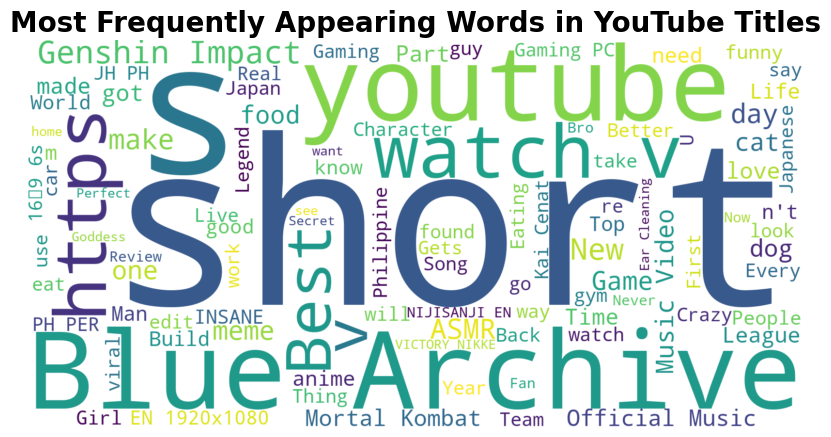

In [20]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

title_text = df['title'].str.cat(sep=' ')
title_tokens = word_tokenize(title_text)
stop_words = set(stopwords.words('english'))
title_wordcloud = WordCloud(width=1600, height=800, background_color='white', max_words=100).generate(' '.join(title_tokens))

plt.figure(figsize=(10, 8))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.title('Most Frequently Appearing Words in YouTube Titles', fontsize=20, weight='bold')
plt.axis("off")
plt.show()

There are words frequently appearing that are obvious or are in line with the platform. For instance, the "short/s" word references that it might be YouTube shorts that I watched. Words like "https" appear because there are some values in the title column that are not specified and have a url link to the video as a placeholder for it. Another thing to consider is that I use Youtube as the platform where I listen to most of my music, thus the appearance of words like "Official Music", "Music Video", "Video", "Lyric Video", "Live". I will use custom stopwords to filter out these words to better visualize the content I consume.

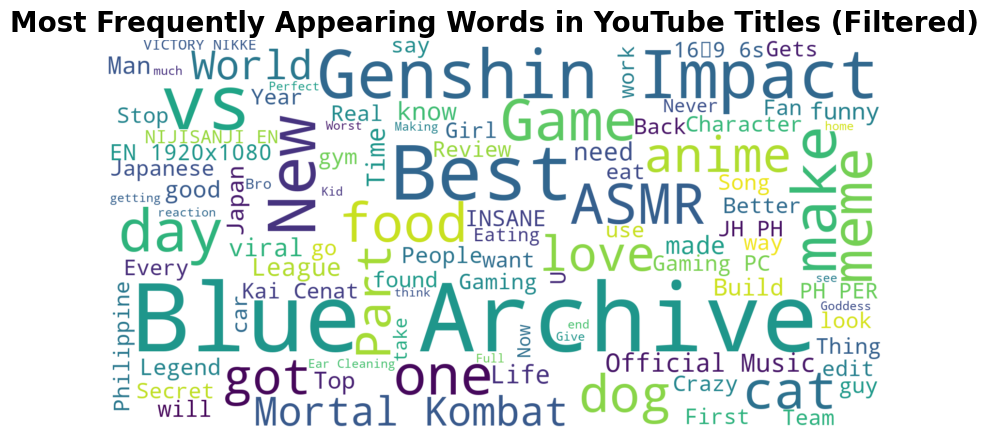

In [21]:
import re

# Custom stopwords list to prevent words like short, youtube, https from apperaing
custom_stopwords = ["shorts", "youtube", "https", "watch v", "Official Music", "Music Video", "Video", "Lyric Video", "Live", "v", "s", "Watch", "re", "n't", "m"]
stop_words = set(stopwords.words('english'))

filtered_stop_words = stop_words.union(custom_stopwords)
filtered_title_text = df['title'].str.cat(sep=' ')
filtered_title_tokens = word_tokenize(filtered_title_text)

# Use regex for better pattern matching maybe
pattern = r'\b(?:' + '|'.join(re.escape(word) for word in custom_stopwords) + r')\b'
filtered_title_tokens = [word for word in filtered_title_tokens if not re.search(pattern, word, re.IGNORECASE)]
filtered_title_text = ' '.join(filtered_title_tokens)
filtered_title_wordcloud = WordCloud(width=1600, height=800, background_color='white', max_words=100).generate(filtered_title_text)

plt.figure(figsize=(10, 8))
plt.imshow(filtered_title_wordcloud, interpolation='bilinear')
plt.title('Most Frequently Appearing Words in YouTube Titles (Filtered)', fontsize=20, weight='bold')
plt.axis("off")
plt.show()

After filtering through some words a more cohesive visualization of the content I watched on youtube during this time.

Some things to hightlight are:

**Games**
- Blue Archieve: I started playing this game at the end of July, have played it ever since, and have watched videos on guides on how to progress faster.
- Genshin Impact: I still actively watch Genshin videos, focusing more on the gameplay and character guides (hence the appearance of the "character" word).
- Victory Nikke (Goddess of Victory: Nikke): I came back to playing this game just recently because of its 1st anniversary event and binge-watched content related to it.
- League of Legends: This is the same with GI, in which I still watch highlight videos from different channels.
- Mortal Kombat: This is the new installment of the game, so I watched content related to it because I couldn't afford the game.

**General Entertainment**
- meme: I watch meme content on Youtube.
- Gaming PC: This mainly pertains to PC building. I love watching these videos since I'm around computers at an early age, so I watch different tech YouTubers build PCs.
- anime: Technically, I play anime-related content, so this might be the reason. I don't use YouTube to watch anime, as I use another app for it (Aniyomi), but I watch some clips of anime content every now and then.
- ASMR: I'm reliant on this type of video because it helps me sleep at night. This is the reason why the word "ear cleaning" also appears, as this is the most common type of ASMR I listen to.
- Virtual Livers: I watch some vtuber content (NIJISANJI EN), especially those vtuber that I genuinely think are entertaining.
- food: I mainly watch food content from Japan and the Philippines.

Overall, my YouTube consumption appears to be a balanced mix of gaming-related content, general entertainment encompassing memes, tech-related videos, anime snippets, ASMR for relaxation, Virtual Livers (NIJISANJI EN), and food-related content from Japan and the Philippines.

### How many Ads did I encounter?

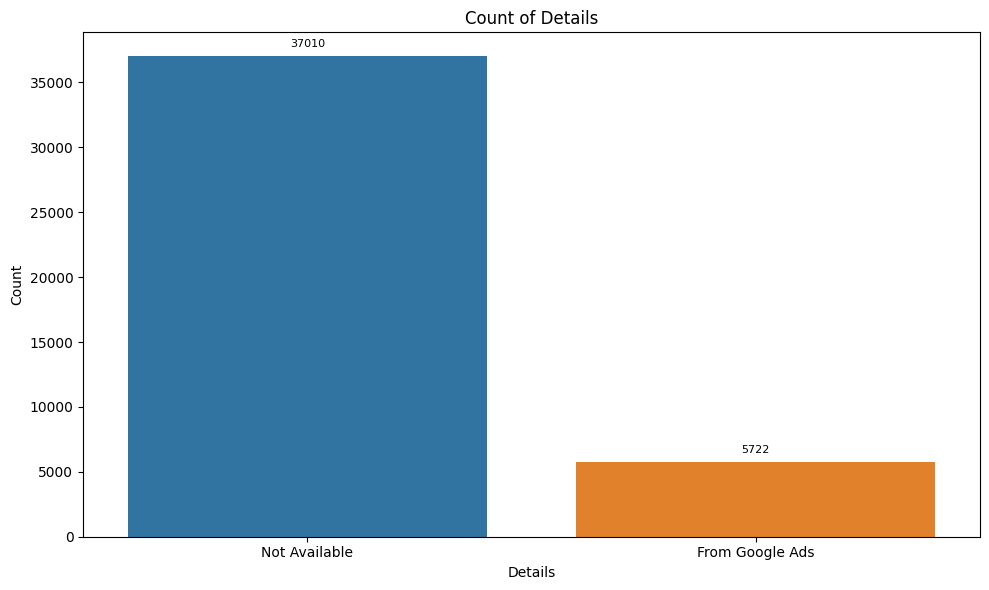

In [22]:
df['details'].fillna('Not Available', inplace=True)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='details', order=df['details'].value_counts().index)
plt.title('Count of Details')
plt.xlabel('Details')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=8,
                color='black')

plt.tight_layout()
plt.show()

The "Not Available" counts pertain to videos that are not ads, and the other is, well, ads. The only time I encounter ads is when using Youtube with my phone, as I use an adblocker when I access Youtube on my laptop. I'm surprised that the count of ads (5722) I encountered is low. Then again, I use adblock, as YouTube ads are way too aggressive. I think this number will be higher if I don't use adblock on my laptop, and this count is already 13.38% of the videos I "watched.".

### What is my average watch/listen time?

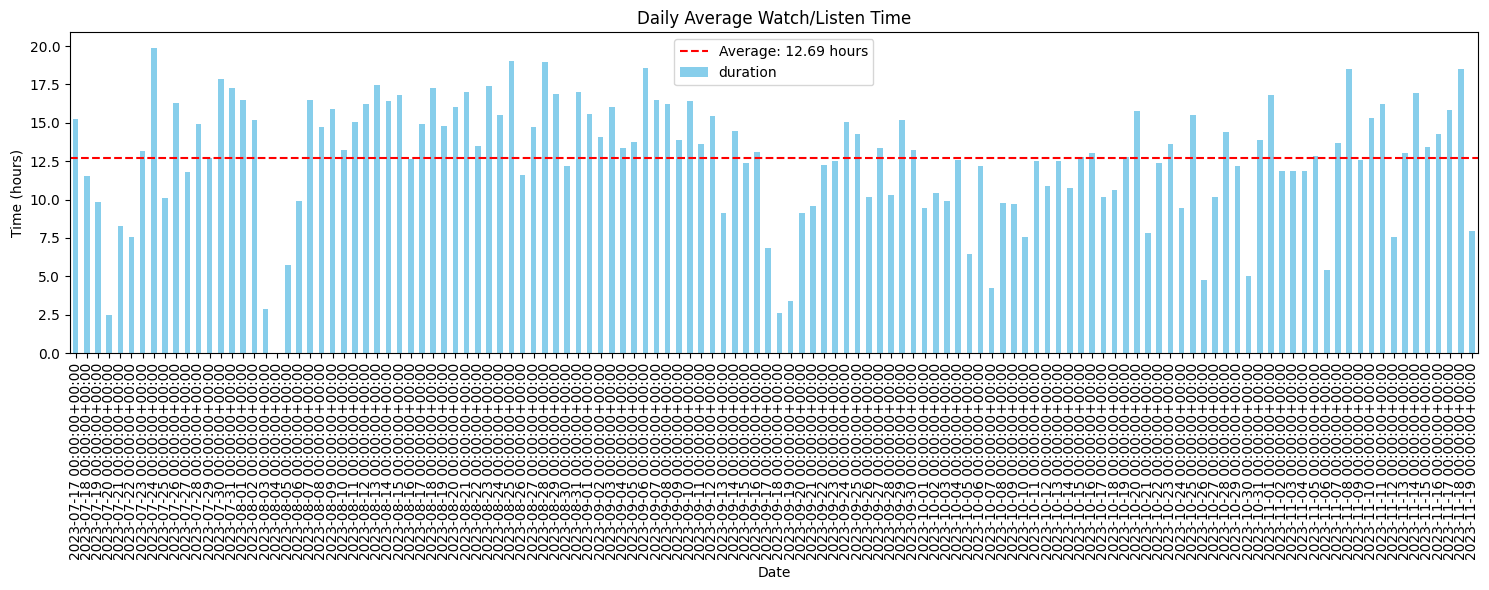

In [23]:
df['duration'] = pd.to_timedelta(df['duration'])
df.set_index('time', inplace=True)
daily_watch_time = df.resample('D')['duration'].sum() / pd.Timedelta(hours=1)
average_daily_watch_time = daily_watch_time.mean()

# Plot the daily watch time
plt.figure(figsize=(15, 6))
daily_watch_time.plot(kind='bar', color='skyblue')
plt.xlabel('Date')
plt.ylabel('Time (hours)')
plt.title('Daily Average Watch/Listen Time')
plt.axhline(average_daily_watch_time, color='red', linestyle='--', label=f'Average: {average_daily_watch_time:.2f} hours')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Starting from July 17, 2023, to November 19, 2023, my daily average watch or listen time is 12.69 hours, which I think is still an approximation of my actual time spent on the platform. Some key observations are that August 4, 2023, is my graduation day, and I did not access YouTube on this day. The low watch times could be attributed to a power outage, I'm out for social occasions or events. As for the days that I have high watch times, it is either that I slept late and woke up early, then proceeded to continue consuming content on Youtube. This presents or highlights that my most used application across mobile, desktop, and laptop is indeed YouTube.